data loading

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd

In [35]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Angraj project dmkd/01. bank-additional-full.csv', sep=";")

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 41188 rows and 21 columns.


In [36]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [38]:
missing_values

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Finding outliers

Histogram

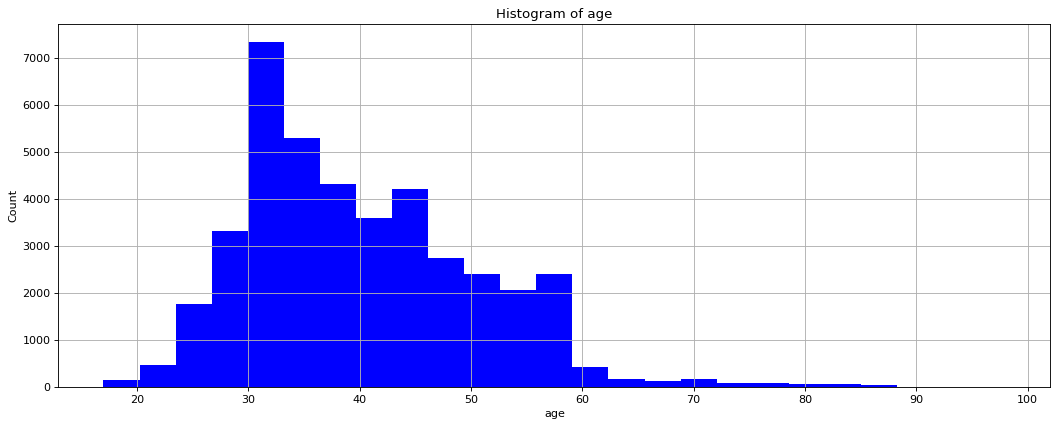

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)



# the histogram of the data
plt.hist(df['age'], 25, facecolor='b')

plt.xlabel('age')
plt.ylabel('Count')
plt.title('Histogram of age')
plt.grid(True)
plt.show()

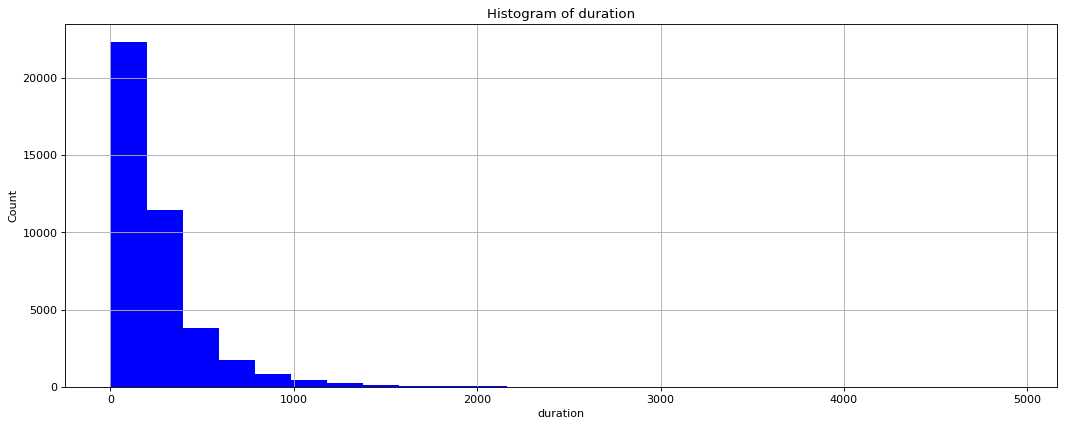

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)



# the histogram of the data
plt.hist(df['duration'], 25, facecolor='b')

plt.xlabel('duration')
plt.ylabel('Count')
plt.title('Histogram of duration')
plt.grid(True)
plt.show()

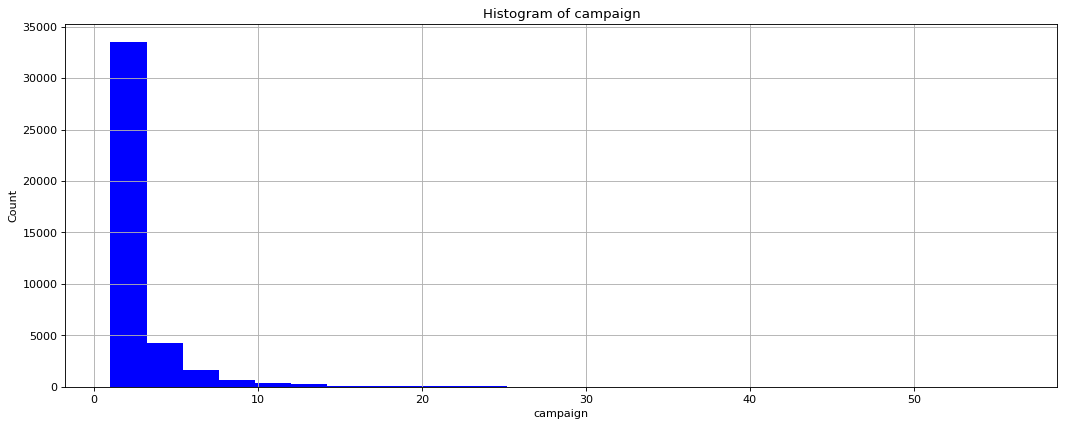

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)



# the histogram of the data
plt.hist(df['campaign'], 25, facecolor='b')

plt.xlabel('campaign')
plt.ylabel('Count')
plt.title('Histogram of campaign')
plt.grid(True)
plt.show()

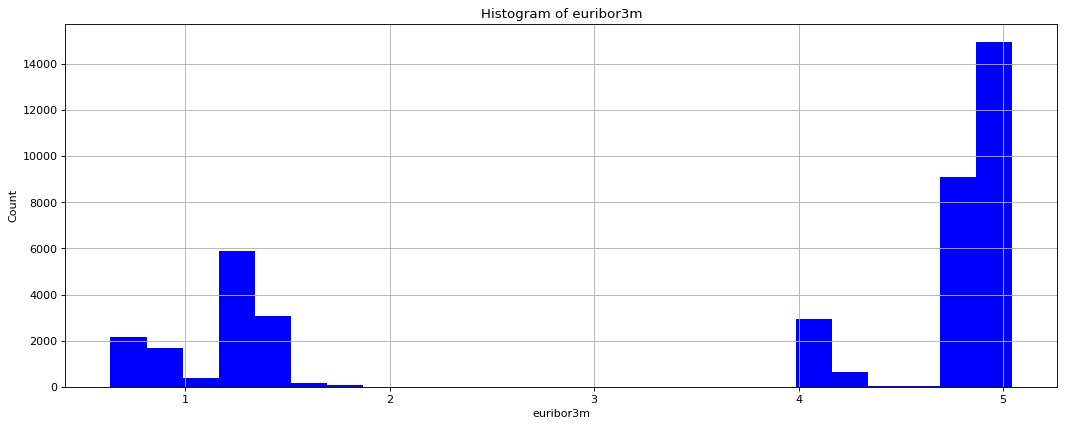

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)



# the histogram of the data
plt.hist(pre_df['euribor3m'], 25, facecolor='b')

plt.xlabel('euribor3m')
plt.ylabel('Count')
plt.title('Histogram of euribor3m')
plt.grid(True)
plt.show()

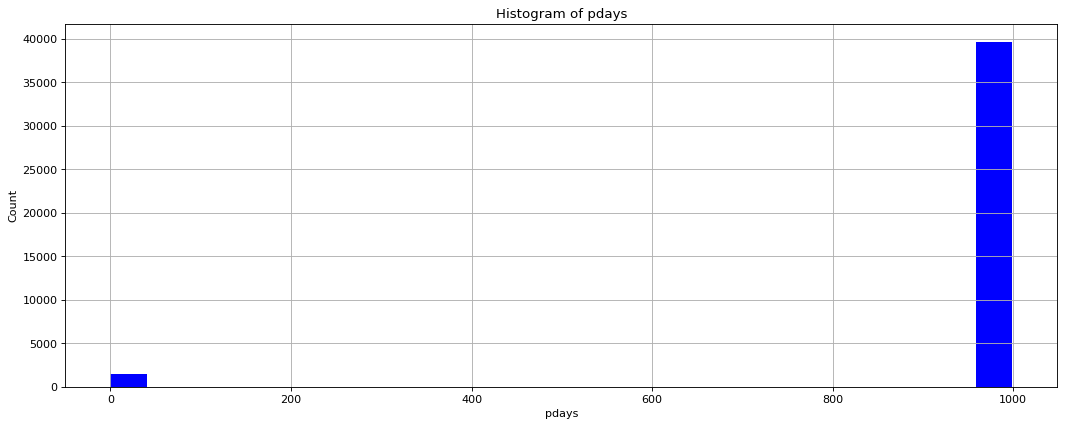

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)



# the histogram of the data
plt.hist(df['pdays'], 25, facecolor='b')

plt.xlabel('pdays')
plt.ylabel('Count')
plt.title('Histogram of pdays')
plt.grid(True)
plt.show()

Scatterplots

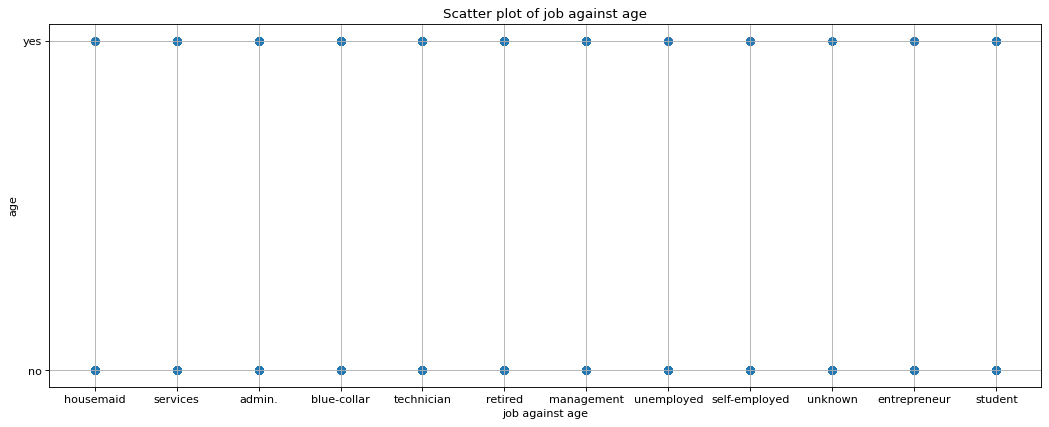

In [48]:
figure(figsize=(16, 6), dpi=80)
plt.scatter(df['job'], df['y'])
plt.xlabel('job against age')
plt.ylabel('age')
plt.title('Scatter plot of job against age')
plt.grid(True)
plt.show()

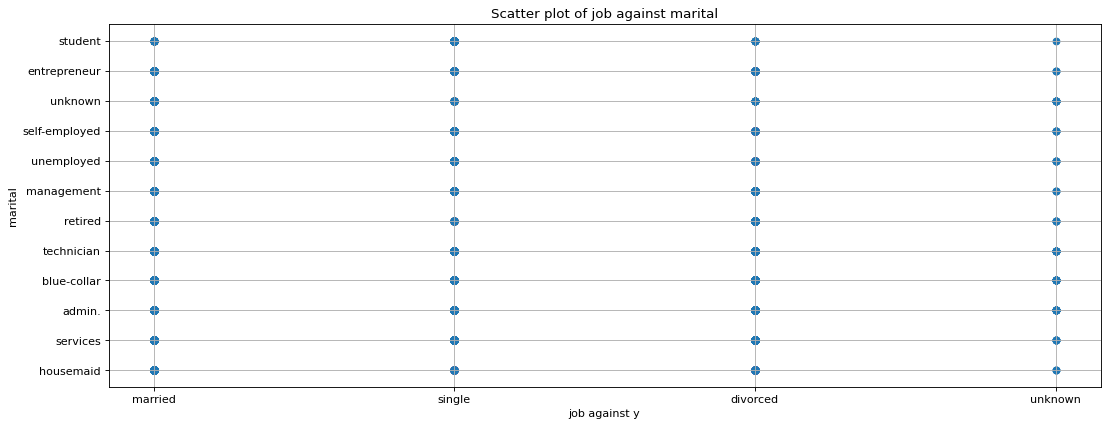

In [50]:
figure(figsize=(16, 6), dpi=80)
plt.scatter(df['marital'], df['job'])
plt.xlabel('job against y')
plt.ylabel('marital')
plt.title('Scatter plot of job against marital')
plt.grid(True)
plt.show()

min max normalization

In [51]:
normalized_df = pre_df

normalized_df['nr.employed']=(pre_df['nr.employed']-pre_df['nr.employed'].min())/(pre_df['nr.employed'].max()-pre_df['nr.employed'].min())

In [52]:
normalized_df['nr.employed'].describe()

count    41188.000000
mean         0.769134
std          0.273163
min          0.000000
25%          0.512287
50%          0.859735
75%          1.000000
max          1.000000
Name: nr.employed, dtype: float64

In [53]:
normalized_df['cons.price.idx']=(pre_df['cons.price.idx']-pre_df['cons.price.idx'].min())/(pre_df['cons.price.idx'].max()-pre_df['cons.price.idx'].min())

In [54]:
normalized_df['cons.price.idx'].describe()

count    41188.000000
mean         0.535723
std          0.225581
min          0.000000
25%          0.340608
50%          0.603274
75%          0.698753
max          1.000000
Name: cons.price.idx, dtype: float64

NUMERICAL METHODS FOR IDENTIFYING OUTLIERS

Interquartile range

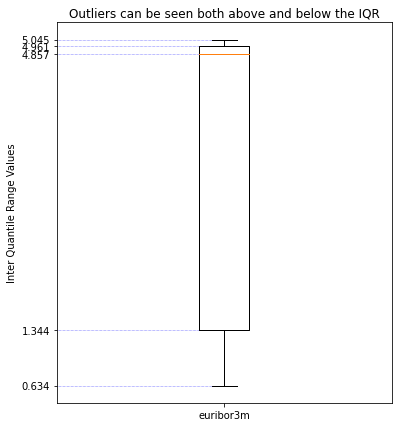

In [55]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(normalized_df['euribor3m'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['euribor3m'])

quantiles = np.quantile(normalized_df['euribor3m'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()


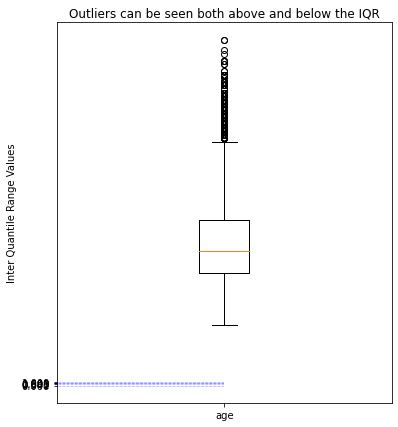

In [32]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(normalized_df['age'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['age'])

quantiles = np.quantile(normalized_df['cons.price.idx'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pylab as plt


fig = plt.figure(1, figsize=(6, 7))
ax = fig.add_subplot(111)

ax.set_title('Outliers can be seen both above and below the IQR')

ax.boxplot(normalized_df['age'], vert=True, manage_ticks=True)
ax.set_ylabel('Inter Quantile Range Values')
# ax.set_yticklabels(['Min','Q1','Median', 'Q3','Max'])
ax.set_xticklabels(['age'])

quantiles = np.quantile(normalized_df['cons.price.idx'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.hlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xlim(0.5, 1.5)
ax.set_yticks(quantiles)
plt.show()